# Abstract 

1. Whats the problem statement?

    To predict and understand what factors help in retaining customers 

    Understanding the importance of Exploratory Data Analysis(EDA) to prepare data in the right way to get good results and Implement SHAP analysis to get feature importance.

2. What did you do?
    
    Performed EDA on data using techniques like Data Imputation, outlier detection and removal, finding features with high multi-collinearity and removal of these features to get better performance of model.

3. How well did it work?

    Accuracy of the model was accuracy is 89% and on removal of outlier the accuracy of model increases 2% apart from those, other parameters are pretty much the same.

4. What did you learn?

    How classification models help predict weather a customer would churn. How finding Multicollinearity to eleminate redudant effect, how imputation helps in achieving better results and how outliers effect the outcome of the model. 









Mistakes i have made On the last assignment







# Basic terminology 

**Scaling of data -**


Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardized (μ=0, σ=1) is usually used prior to model fitting.

**Multicollinearity -**

 Multicollinearity occurs when there are two or more independent variables, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent (Target) variable. For more details - https://towardsdatascience.com/multi-collinearity-in-regression-fe7a2c1467ea



**Variance Inflation Factor-** 

A variance inflation factor (VIF) provides a measure of multicollinearity among the independent variables. A large variance inflation factor (VIF) on an independent variable indicates a highly collinear relationship to the other variables. For more details - https://www.investopedia.com/terms/v/variance-inflation-factor.asp


 **Understanding 
True Positive(TP),True Negative(TN),False Positive(FP),False Negative (FN)**

True Positive:
Interpretation: You predicted positive and it’s true.
You predicted that a woman is pregnant and she actually is.





True Negative:
Interpretation: You predicted negative and it’s true.
You predicted that a man is not pregnant and he actually is not.




False Positive: (Type 1 Error)
Interpretation: You predicted positive and it’s false.
You predicted that a man is pregnant but he actually is not.




False Negative: (Type 2 Error)
Interpretation: You predicted negative and it’s false.
You predicted that a woman is not pregnant but she actually is.





Understanding  




More on - 
1.  **Confusion Matrix - ** https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
2.  **Classification report - ** https://www.youtube.com/watch?v=XiUlqN1Ay0U&t=300s


Permutation Importance- 

Permutation feature importance calculates feature importance by shuffling each predictor and recording the increase in RMSE(root mean square error). This will allow us to assess which predictors are useful for making predictions.

More on it-

https://towardsdatascience.com/from-scratch-permutation-feature-importance-for-ml-interpretability-b60f7d5d1fe9

# 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%pip install mlxtend --upgrade
!pip install eli5


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
df = pd.read_csv('./telecom_churn.csv')
df.head(5)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [5]:
df.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [6]:
df.nunique()

Churn                 2
AccountWeeks        212
ContractRenewal       2
DataPlan              2
DataUsage           174
CustServCalls        10
DayMins            1667
DayCalls            119
MonthlyCharge       627
OverageFee         1024
RoamMins            162
dtype: int64

  This gives us unique values for each field. we see there in total of 3 catagorical feature ( with value 2 values )  ie. Churn, ContractRenewal & DataPlan and rest are all numeric.

In [7]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


there are total of 11 features out of which Churn is Dependent/Target variable. this is Data Frame with descriptive statistics for features.

In [8]:
colmn = df.columns
binary_colmns = []
numeric_colmns= []
for i in colmn:
    if df[i].value_counts().shape[0] == 2:
        binary_colmns.append(i)
    else:
      
      numeric_colmns.append(i)

we use the above code snippet to set the lists binary_colmn and numeric_colmns with catagorical columns and numeric columns respectively 

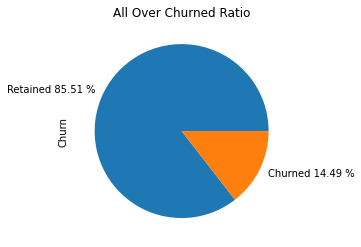

In [9]:
df["Churn"].value_counts().plot(kind="pie", title="All Over Churned Ratio",
                                labels = ["Retained {:.2f} %".format(len(df.loc[df.Churn==0])*100/len(df.Churn)),
                                          "Churned {:.2f} %".format(len(df.loc[df.Churn==1])*100/len(df.Churn))],
                                figsize=(4,4))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


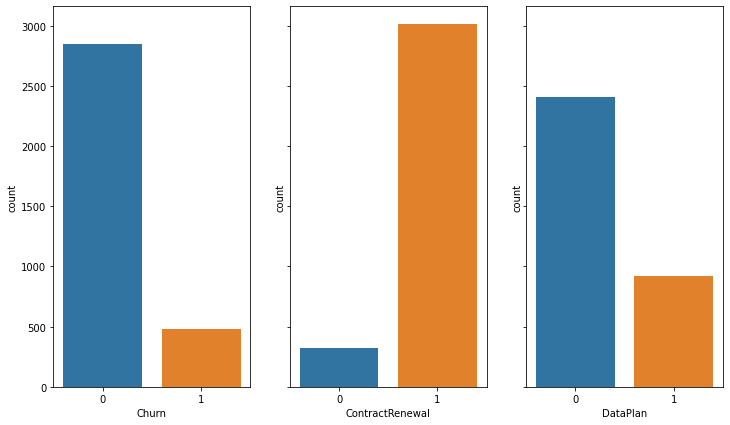

In [10]:
fig, axes = plt.subplots(1, len(binary_colmns), figsize=(12, 7), sharey=True)
j=0
for i in binary_colmns:
  sns.countplot(str(i), data=df, ax=axes[binary_colmns.index(i)])

<Figure size 576x360 with 0 Axes>

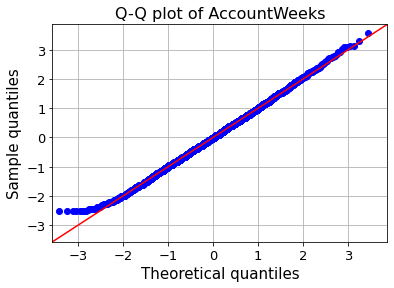

<Figure size 576x360 with 0 Axes>

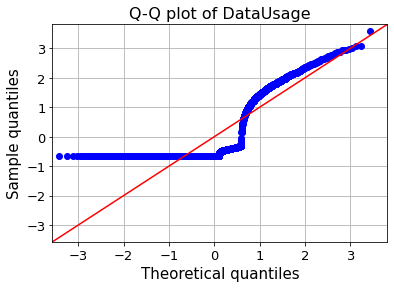

<Figure size 576x360 with 0 Axes>

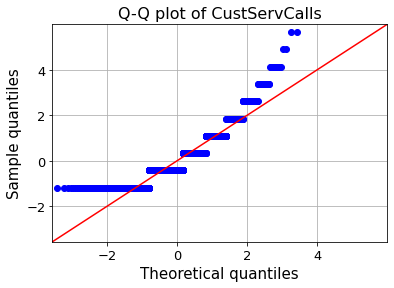

<Figure size 576x360 with 0 Axes>

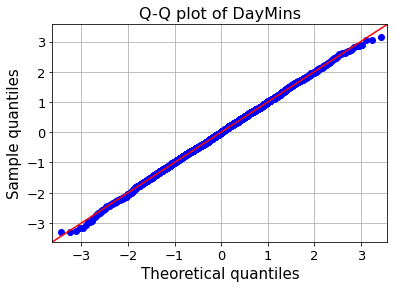

<Figure size 576x360 with 0 Axes>

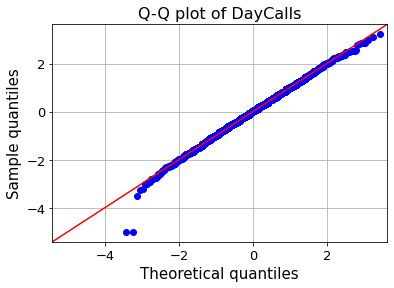

<Figure size 576x360 with 0 Axes>

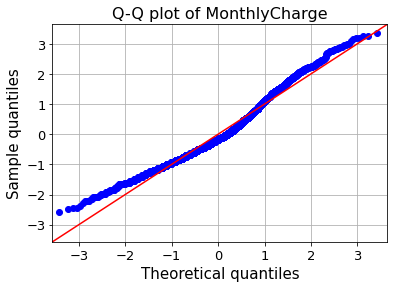

<Figure size 576x360 with 0 Axes>

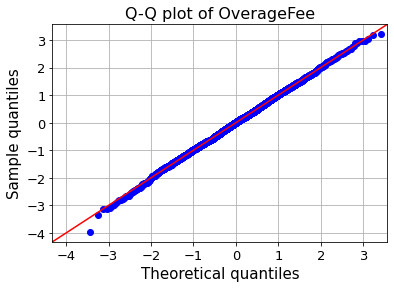

<Figure size 576x360 with 0 Axes>

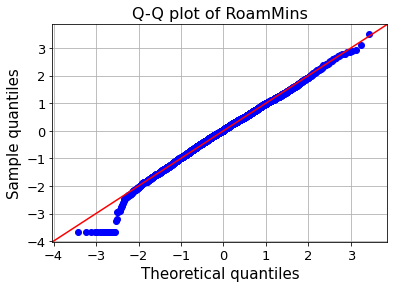

In [11]:
from statsmodels.graphics.gofplots import qqplot
for i in numeric_colmns:
  plt.figure(figsize=(8,5))
  fig=qqplot(df[i],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(i),fontsize=16)
  plt.grid(True)
  plt.show()

1.   In the above plots we can see most of the independent variable are normally distributed except for Customer Service Call (CustServCalls) and Data Usage.
2.   A better understanding how QQ plots work and how independent variable's distribution can be found are in the links below

  

*   https://towardsdatascience.com/q-q-plots-explained-5aa8495426c0
*   https://www.geeksforgeeks.org/qqplot-quantile-quantile-plot-in-python/



  

In [12]:
numeric_df=pd.DataFrame([df.AccountWeeks,df.DayMins,df.DayCalls,df.OverageFee,df.RoamMins,df.DataUsage,df.MonthlyCharge,df.CustServCalls]).transpose()
binary_df=pd.DataFrame([df.DataPlan,df.Churn,df.ContractRenewal]).transpose()
numeric_df.head()

,AccountWeeks,DayMins,DayCalls,OverageFee,RoamMins,DataUsage,MonthlyCharge,CustServCalls
0,128.0,265.1,110.0,9.87,10.0,2.7,89.0,1.0
1,107.0,161.6,123.0,9.78,13.7,3.7,82.0,1.0
2,137.0,243.4,114.0,6.06,12.2,0.0,52.0,0.0
3,84.0,299.4,71.0,3.10,6.6,0.0,57.0,2.0
4,75.0,166.7,113.0,7.42,10.1,0.0,41.0,3.0


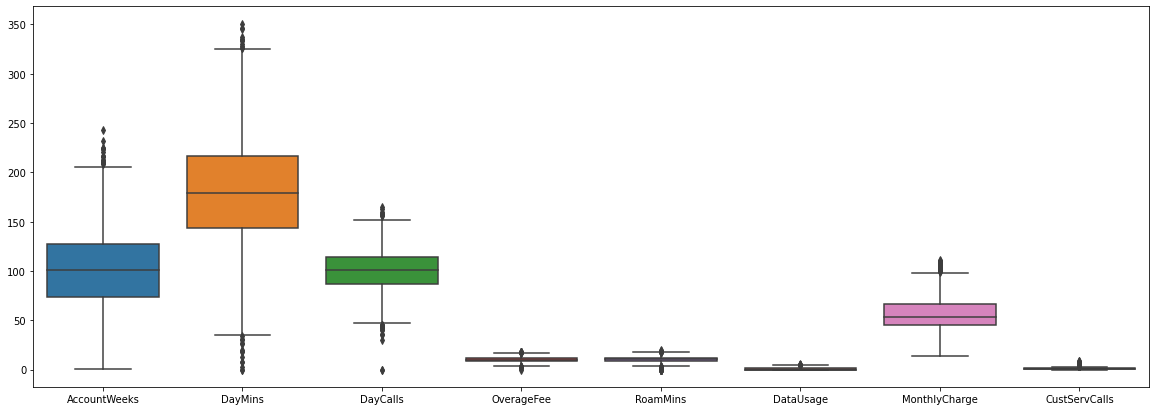

In [13]:
plt.figure(figsize=(20,7))
sns.boxplot(data=numeric_df)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
numeric_df = pd.DataFrame(scaler.fit_transform(numeric_df),columns=numeric_df.columns)

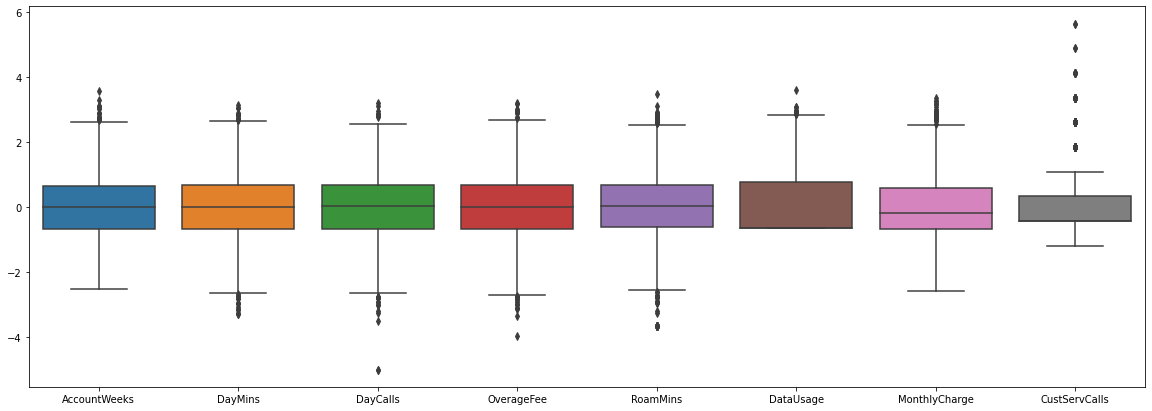

In [15]:
plt.figure(figsize=(20,7))
sns.boxplot(data=numeric_df)

In [16]:
df=pd.concat([numeric_df,binary_df], axis=1)

In [17]:
df.head()

,AccountWeeks,DayMins,DayCalls,OverageFee,RoamMins,DataUsage,MonthlyCharge,CustServCalls,DataPlan,Churn,ContractRenewal
0,0.676489,1.566767,0.476643,-0.071584,-0.085008,1.480204,1.990727,-0.427932,1,0,1
1,0.149065,-0.333738,1.124503,-0.107082,1.240482,2.266072,1.564510,-0.427932,1,0,1
2,0.902529,1.168304,0.675985,-1.574346,0.703121,-0.641642,-0.262133,-1.188218,0,0,1
3,-0.428590,2.196596,-1.466936,-2.741846,-1.303026,-0.641642,0.042307,0.332354,0,0,0
4,-0.654629,-0.240090,0.626149,-1.037927,-0.049184,-0.641642,-0.931902,1.092641,0,0,0


In [18]:
#Pearson's Correlation methord
corr = df.corr(method='pearson')

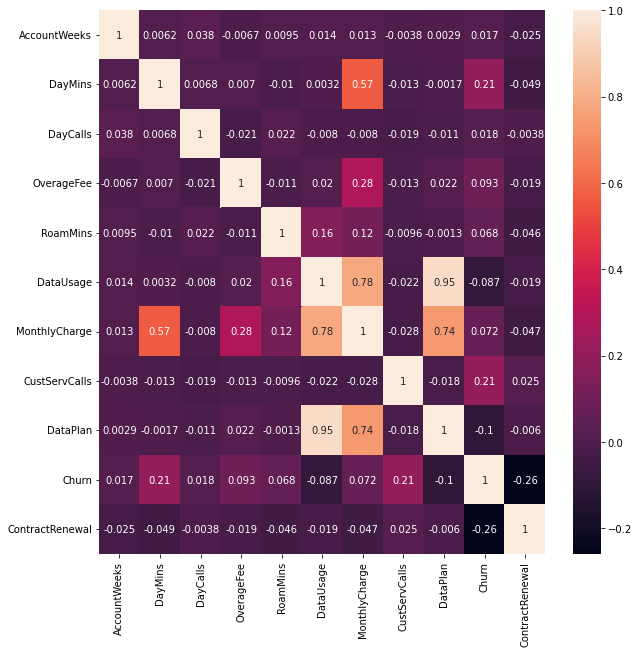

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,xticklabels=df.columns,yticklabels=df.columns,annot=True,ax=ax)

We can conclude that ContractactRenewal, CustServCalls, DataPlan, DataUsage and DayMins are fairly related. Values of correlation are supposed be in range from +1 and -1, with values close to +1 to show strong (+)ve correlation and values close to -1 to show strong (-)ve correlation and 0 if absolutly no relation. We also observe very strong Multicollinearity between features, DataPlans and DataUsage as well as MonthlyCharges with DataPlan and DataUsage. hence we shall calculate Variance Inflation Factor (VIF)

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, j)
                          for j in range(len(df.columns))]
  
print(vif_data)

            feature          VIF
0      AccountWeeks     1.002924
1           DayMins  1031.417153
2          DayCalls     1.003347
3        OverageFee   224.627101
4          RoamMins     1.261471
5         DataUsage  1963.147209
6     MonthlyCharge  3242.933148
7     CustServCalls     1.049729
8          DataPlan    12.464419
9             Churn     1.265908
10  ContractRenewal     4.017902


Here we calculate the variance inflation factor (VIF). We observe DayMins, OverageFee, DataUsage, MonthlyCharge features have fairly high VIF values

The permisabe range for VIF is less than 5 or 10 based on the problem.

In [21]:
def correlation(dataset, threshold):
  col_corr = set ()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i, j]) > threshold:
        colname = corr_matrix.columns [i] # getting the name of column
        col_corr.add(colname)
  print(col_corr)
  return col_corr
col_corr=correlation(df,0.7)

{'MonthlyCharge', 'DataPlan'}


In this code snipet we get name of feature which show high collinearity based on the threshold we set

I've set the threshold to 0.7  

In [22]:
columns=[]
columns= col_corr
df.drop(columns, inplace=True, axis=1)

This code simply finds all the features which has values of Collinearity greater than the threshold( recommended value for threshold is greater than 0.7 based on problem) subsequentily we drop these features off the data frame.

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
  
print(vif_data)

           feature       VIF
0     AccountWeeks  1.002247
1          DayMins  1.047983
2         DayCalls  1.003339
3       OverageFee  1.011622
4         RoamMins  1.037449
5        DataUsage  1.038619
6    CustServCalls  1.047095
7            Churn  1.218456
8  ContractRenewal  1.103001


Here we simply recalculate the VIF values again. As we can see here on drop of features MonthlyCharges and DataPlan the VIF score of most of the features has reduced down to less than 5. which is still acceptable.

In [24]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm
model = sm.OLS(df['Churn'], df[['DayMins', 'DayCalls','AccountWeeks','OverageFee','RoamMins','DataUsage','CustServCalls','ContractRenewal']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Churn   R-squared (uncentered):                   0.179
Model:                            OLS   Adj. R-squared (uncentered):              0.177
Method:                 Least Squares   F-statistic:                              90.80
Date:                Thu, 15 Dec 2022   Prob (F-statistic):                   9.79e-137
Time:                        18:56:08   Log-Likelihood:                         -1181.0
No. Observations:                3333   AIC:                                      2378.
Df Residuals:                    3325   BIC:                                      2427.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
DayMins             0.0750      0.006     12.538      0.000       0.063       0.087
DayCalls            0.0070      0.006      1.173      0.241      -0.005       0.019
AccountWeeks        0.0066      0.006      1.109      0.267      -0.005       0.018
OverageFee          0.0350      0.006      5.848      0.000       0.023       0.047
RoamMins            0.0329      0.006      5.424      0.000       0.021       0.045
DataUsage          -0.0347      0.006     -5.729      0.000      -0.047      -0.023
CustServCalls       0.0738      0.006     12.335      0.000       0.062       0.086
ContractRenewal     0.1161      0.006     18.447      0.000       0.104       0.128
==============================================================================
Omnibus:                      985.852   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2174.496
Skew:                           1.735   Prob(JB):                         0.00
Kurtosis:                       4.903   Cond. No.                         1.19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*   A p-value measures the probability of obtaining the observed results,assuming that the null hypothesis is true.
*   A p-value of 0.05 or lower is generally considered statistically significant.


DayCalls, AccountWeeks have P value greater than 0.05 they can be considered non-sigificant.


For More details on P values 
*   https://www.investopedia.com/terms/p/p-value.asp
*   https://youtu.be/zII6KLR4Lb4


In [25]:
# NullValue Setter function
def nullfiller(df,per):

  # get dimensions of df
  nrows, ncols = len(df.index), len(df.columns)          

  volume = nrows * ncols                    # total number of entries in df
  volume_to_be_nan = int(volume * per)      # number of entries to turn to NaN as per percentage

  # randomly generate index locations for the new NaNs
  indices = np.random.randint(volume, size=volume_to_be_nan)
  row_indices = indices % nrows
  col_indices = (indices / nrows).astype(int)

  # assign NaN to each of the indices in df
  for ri, ci in zip(row_indices, col_indices):
    df.iloc[ri, ci] = np.nan

**NaN** Filler this code snippet intruduces **NaN** values randomly through the data, based percentage of NaNs we want in the data

In [26]:
# KNN Imputer
import numpy as np
from sklearn.impute import KNNImputer

def KNNImp(changed_Numeric):
  imputer = KNNImputer(n_neighbors=2, weights="uniform")
  k=imputer.fit_transform(changed_Numeric)
  k=pd.DataFrame(k)
  k.columns=changed_Numeric.columns
  k.index=changed_Numeric.index
  k=pd.DataFrame(k)
  return k

#  Imputation

In [27]:
# NullValue Setter function
def nullfiller(df,per):

  # get dimensions of df
  nrows, ncols = len(df.index), len(df.columns)          

  volume = nrows * ncols                    # total number of entries in df
  volume_to_be_nan = int(volume * per)      # number of entries to turn to NaN as per percentage

  # randomly generate index locations for the new NaNs
  indices = np.random.randint(volume, size=volume_to_be_nan)
  row_indices = indices % nrows
  col_indices = (indices / nrows).astype(int)

  # assign NaN to each of the indices in df
  for ri, ci in zip(row_indices, col_indices):
    df.iloc[ri, ci] = np.nan

**NaN Filler**
this code snippet intruduces NaN values randomly through the data, based percentage of NaNs we want in the data 

In [28]:
# KNN Imputer
import numpy as np
from sklearn.impute import KNNImputer

def KNNImp(changed_Numeric):
  imputer = KNNImputer(n_neighbors=2, weights="uniform")
  k=imputer.fit_transform(changed_Numeric)
  k=pd.DataFrame(k)
  k.columns=changed_Numeric.columns
  k.index=changed_Numeric.index
  k=pd.DataFrame(k)
  return k

KNNimputer is a scikit-learn class used to fill out or predict the missing values in a dataset. It is a more useful method which works on the basic approach of the KNN algorithm rather than the naive approach of filling all the values with mean or the median. In this approach, we specify a distance from the missing values which is also known as the K parameter. The missing value will be predicted in reference to the mean of the neighbours.

More on it -
* https://www.geeksforgeeks.org/python-imputation-using-the-knnimputer/
* https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html



In [29]:
# Simple Imputer
import numpy as np
from sklearn.impute import SimpleImputer
def SimpleImp(changed_Numeric):
  imp = SimpleImputer(missing_values=np.nan, strategy='mean')
  imp.fit(changed_Numeric)
  c=imp.transform(changed_Numeric)
  c=pd.DataFrame(c)
  c.columns=changed_Numeric.columns
  c.index=changed_Numeric.index
  return c


The SimpleImputer class provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. 

More on it -
*   https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
*   https://www.geeksforgeeks.org/ml-handle-missing-data-with-simple-imputer/



In [30]:
# Iterative Imputer
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
def IterImp(changed_Numeric):
  imp = IterativeImputer(max_iter=10, random_state=0)
  imp.fit(changed_Numeric)
  IterativeImputer(random_state=0)
  f= pd.DataFrame(np.round(imp.transform(changed_Numeric)))
  f.columns=changed_Numeric.columns
  f.index=changed_Numeric.index
  return f

A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

*   https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html
*   https://towardsdatascience.com/iterative-imputation-with-scikit-learn-8f3eb22b1a38



In [31]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error



def mape(actual,pred,mae,mse):
  errormae=[]
  errormse=[]
  for i in k.columns:
    z=mean_absolute_percentage_error(actual[i],pred[i])*100
    g=mean_squared_error(actual[i],pred[i])*100
    errormae.append(z)
    errormse.append(g)
    
  error_tenper[mae]=errormae
  error_tenper[mse]=errormse

  error_tenper.index=actual.columns
  return error_tenper
    #return np.mean(np.abs((actual - pred) / actual)) * 100



maps function calculates mean square error and mean absolute error

In [32]:
df4=df.copy()
original_Numeric = df4.drop(["Churn"], axis=1)
original_Cat = df4[["Churn"]]
nullfiller(df4,0.1)
changed_Numeric = df4.drop(["Churn"], axis=1)
changed_Cat = df4[["Churn"]]

We create original cat(catagorical Data) and numeric(Numeric Data) DataFrames to retain original values and fill 10% of NaN values now changed Numeric(Numeric Data) and Cat(catagorical Data) with NaN values.

In [33]:
def vari(a,m):
  var=np.var(a)
  sse= np.mean((np.mean(a) - original_Numeric)** 2)
  bias = sse - var
  print(m)
  print("*********************varience***********************"+"\n")
  print(var)
  print("#################################################################")

  print("*********************Simple Square error***********************"+"\n")
  print(sse)
  print("#################################################################")

  print("*********************bias***********************"+"\n")
  print(bias)
  print("#################################################################")



function vari calulates Varience, Simple error and Bias

In [34]:
error_tenper=pd.DataFrame()

In [35]:
mae="KNNImputer mean absolute error percentage"
mse="KNNImputer mean square error percentage"
k=KNNImp(changed_Numeric)
mape(original_Numeric,k,mae,mse)

,KNNImputer mean absolute error percentage,KNNImputer mean square error percentage
AccountWeeks,1.201515e+02,13.588422
DayMins,1.886364e+01,12.827238
DayCalls,2.367046e+01,13.840332
OverageFee,5.092583e+01,13.057203
RoamMins,2.793536e+01,11.805849
DataUsage,1.063709e+01,13.605815
CustServCalls,1.390063e+01,15.344042
ContractRenewal,3.648281e+15,1.125113


In [36]:
m= "Varience ,Simple Square and error Bias for KNNImputer" 
vari(k,m)

Varience ,Simple Square and error Bias for KNNImputer
*********************varience***********************

AccountWeeks       0.936580
DayMins            0.941479
DayCalls           0.952504
OverageFee         0.951317
RoamMins           0.947879
DataUsage          0.957437
CustServCalls      0.930460
ContractRenewal    0.082741
dtype: float64
#################################################################
*********************Simple Square error***********************

AccountWeeks       1.000000
DayMins            1.000002
DayCalls           1.000030
OverageFee         1.000076
RoamMins           1.000048
DataUsage          1.000055
CustServCalls      1.000005
ContractRenewal    0.087519
dtype: float64
#################################################################
*********************bias***********************

AccountWeeks       0.063420
DayMins            0.058523
DayCalls           0.047526
OverageFee         0.048759
RoamMins           0.052169
DataUsage          0.042618

In [37]:
mae="SimpleImputer mean absolute error percentage"
mse="SimpleImputer mean square error percentage"
c=SimpleImp(changed_Numeric)
mape(original_Numeric,c,mae,mse)

,KNNImputer mean absolute error percentage,KNNImputer mean square error percentage,SimpleImputer mean absolute error percentage,SimpleImputer mean square error percentage
AccountWeeks,1.201515e+02,13.588422,1.103191e+01,10.969690
DayMins,1.886364e+01,12.827238,8.859620e+00,9.602394
DayCalls,2.367046e+01,13.840332,9.305829e+00,9.496617
OverageFee,5.092583e+01,13.057203,9.231765e+00,8.953358
RoamMins,2.793536e+01,11.805849,1.017337e+01,9.492032
DataUsage,1.063709e+01,13.605815,9.466797e+00,9.071441
CustServCalls,1.390063e+01,15.344042,1.026529e+01,10.965275
ContractRenewal,3.648281e+15,1.125113,3.784296e+15,0.836914


In [38]:
m= "Varience ,Simple Square and error Bias for  SimpleImputer" 
vari(c,m)

Varience ,Simple Square and error Bias for  SimpleImputer
*********************varience***********************

AccountWeeks       0.890393
DayMins            0.903980
DayCalls           0.905038
OverageFee         0.910575
RoamMins           0.905080
DataUsage          0.909304
CustServCalls      0.890363
ContractRenewal    0.079149
dtype: float64
#################################################################
*********************Simple Square error***********************

AccountWeeks       1.000090
DayMins            1.000004
DayCalls           1.000004
OverageFee         1.000109
RoamMins           1.000000
DataUsage          1.000018
CustServCalls      1.000016
ContractRenewal    0.087518
dtype: float64
#################################################################
*********************bias***********************

AccountWeeks       0.109697
DayMins            0.096024
DayCalls           0.094966
OverageFee         0.089534
RoamMins           0.094920
DataUsage          0.09

In [39]:
mae="Iterative Imputer mean absolute error percentage"
mse="Iterative Imputer mean square error percentage"
f=IterImp(changed_Numeric)
mape(original_Numeric,f,mae,mse)

,KNNImputer mean absolute error percentage,KNNImputer mean square error percentage,SimpleImputer mean absolute error percentage,SimpleImputer mean square error percentage,Iterative Imputer mean absolute error percentage,Iterative Imputer mean square error percentage
AccountWeeks,1.201515e+02,13.588422,1.103191e+01,10.969690,6.048723e+01,18.505851
DayMins,1.886364e+01,12.827238,8.859620e+00,9.602394,6.027250e+01,17.376199
DayCalls,2.367046e+01,13.840332,9.305829e+00,9.496617,6.011068e+01,16.963105
OverageFee,5.092583e+01,13.057203,9.231765e+00,8.953358,5.970002e+01,16.457974
RoamMins,2.793536e+01,11.805849,1.017337e+01,9.492032,6.155896e+01,16.974201
DataUsage,1.063709e+01,13.605815,9.466797e+00,9.071441,5.827278e+01,20.270944
CustServCalls,1.390063e+01,15.344042,1.026529e+01,10.965275,6.739181e+01,20.313668
ContractRenewal,3.648281e+15,1.125113,3.784296e+15,0.836914,4.188767e+15,0.930093


In [40]:
m= "Varience ,Simple Square and error Bias for IterativeImputer" 
vari(f,m)

Varience ,Simple Square and error Bias for IterativeImputer
*********************varience***********************

AccountWeeks       0.991169
DayMins            0.989766
DayCalls           0.983142
OverageFee         0.984394
RoamMins           0.978046
DataUsage          1.197969
CustServCalls      0.748845
ContractRenewal    0.079933
dtype: float64
#################################################################
*********************Simple Square error***********************

AccountWeeks       1.000130
DayMins            1.000032
DayCalls           1.000056
OverageFee         1.000004
RoamMins           1.000052
DataUsage          1.013552
CustServCalls      1.011731
ContractRenewal    0.087605
dtype: float64
#################################################################
*********************bias***********************

AccountWeeks       0.008961
DayMins            0.010266
DayCalls           0.016914
OverageFee         0.015610
RoamMins           0.022006
DataUsage         -0.

In [41]:
df5=df.copy()
original_Numeric_5per = df5.drop(["Churn"], axis=1)
original_Cat_5per = df5[["Churn"]]
nullfiller(df5,0.05)
changed_Numeric_5per = df5.drop(["Churn"], axis=1)
changed_Cat_5per = df5[["Churn"]]

We create original cat(catagorical Data) and numeric(Numeric Data) DataFrames to retain original values and fill 5% of NaN values now changed Numeric(Numeric Data) and Cat(catagorical Data) with NaN values.

In [42]:
error_tenper=pd.DataFrame()

In [43]:
changed_Numeric.isna().sum()

AccountWeeks       332
DayMins            296
DayCalls           310
OverageFee         300
RoamMins           339
DataUsage          314
CustServCalls      342
ContractRenewal    309
dtype: int64

In [44]:
mae="KNNImputer mean absolute error percentage"
mse="KNNImputer mean square error percentage"
k=KNNImp(changed_Numeric_5per)
mape(original_Numeric_5per,k,mae,mse)

,KNNImputer mean absolute error percentage,KNNImputer mean square error percentage
AccountWeeks,3.767772e+01,5.888233
DayMins,1.860773e+01,8.468141
DayCalls,1.406318e+01,7.901669
OverageFee,7.883888e+01,6.488437
RoamMins,1.324644e+01,5.309706
DataUsage,5.266282e+00,6.505726
CustServCalls,7.246821e+00,10.331973
ContractRenewal,1.418776e+15,0.570057


In [45]:
m= "Varience ,Simple Square and error Bias for KNNImputer" 
vari(k,m)

Varience ,Simple Square and error Bias for KNNImputer
*********************varience***********************

AccountWeeks       0.975695
DayMins            0.966337
DayCalls           0.972484
OverageFee         0.968633
RoamMins           0.985703
DataUsage          0.977060
CustServCalls      0.952079
ContractRenewal    0.086566
dtype: float64
#################################################################
*********************Simple Square error***********************

AccountWeeks       1.000066
DayMins            1.000039
DayCalls           1.000012
OverageFee         1.000015
RoamMins           1.000000
DataUsage          1.000005
CustServCalls      1.000020
ContractRenewal    0.087521
dtype: float64
#################################################################
*********************bias***********************

AccountWeeks       0.024370
DayMins            0.033702
DayCalls           0.027528
OverageFee         0.031381
RoamMins           0.014298
DataUsage          0.022945

In [46]:
mae="SimpleImputer mean absolute error percentage"
mse="SimpleImputer mean square error percentage"
c=SimpleImp(changed_Numeric_5per)
mape(original_Numeric_5per,c,mae,mse)

,KNNImputer mean absolute error percentage,KNNImputer mean square error percentage,SimpleImputer mean absolute error percentage,SimpleImputer mean square error percentage
AccountWeeks,3.767772e+01,5.888233,4.334685e+00,4.500279
DayMins,1.860773e+01,8.468141,4.816643e+00,5.544087
DayCalls,1.406318e+01,7.901669,4.846830e+00,5.177923
OverageFee,7.883888e+01,6.488437,5.070804e+00,5.470940
RoamMins,1.324644e+01,5.309706,4.541963e+00,3.950407
DataUsage,5.266282e+00,6.505726,5.138258e+00,4.676338
CustServCalls,7.246821e+00,10.331973,5.250254e+00,7.968671
ContractRenewal,1.418776e+15,0.570057,1.585017e+15,0.359356


In [47]:
m= "Varience ,Simple Square and error Bias for  SimpleImputer" 
vari(c,m)

Varience ,Simple Square and error Bias for  SimpleImputer
*********************varience***********************

AccountWeeks       0.955010
DayMins            0.944569
DayCalls           0.948265
OverageFee         0.945307
RoamMins           0.960501
DataUsage          0.953239
CustServCalls      0.920324
ContractRenewal    0.083925
dtype: float64
#################################################################
*********************Simple Square error***********************

AccountWeeks       1.000013
DayMins            1.000010
DayCalls           1.000044
OverageFee         1.000016
RoamMins           1.000005
DataUsage          1.000002
CustServCalls      1.000011
ContractRenewal    0.087519
dtype: float64
#################################################################
*********************bias***********************

AccountWeeks       0.045003
DayMins            0.055441
DayCalls           0.051779
OverageFee         0.054709
RoamMins           0.039504
DataUsage          0.04

In [48]:
mae="Iterative Imputer mean absolute error percentage"
mse="Iterative Imputer mean square error percentage"
f=IterImp(changed_Numeric_5per)
mape(original_Numeric_5per,f,mae,mse)

,KNNImputer mean absolute error percentage,KNNImputer mean square error percentage,SimpleImputer mean absolute error percentage,SimpleImputer mean square error percentage,Iterative Imputer mean absolute error percentage,Iterative Imputer mean square error percentage
AccountWeeks,3.767772e+01,5.888233,4.334685e+00,4.500279,5.790144e+01,12.567360
DayMins,1.860773e+01,8.468141,4.816643e+00,5.544087,5.816230e+01,13.640045
DayCalls,1.406318e+01,7.901669,4.846830e+00,5.177923,5.816004e+01,13.009724
OverageFee,7.883888e+01,6.488437,5.070804e+00,5.470940,5.760505e+01,13.311403
RoamMins,1.324644e+01,5.309706,4.541963e+00,3.950407,5.920802e+01,11.924203
DataUsage,5.266282e+00,6.505726,5.138258e+00,4.676338,5.628624e+01,16.400135
CustServCalls,7.246821e+00,10.331973,5.250254e+00,7.968671,6.591430e+01,17.892387
ContractRenewal,1.418776e+15,0.570057,1.585017e+15,0.359356,1.756580e+15,0.390039


In [49]:
m= "Varience ,Simple Square and error Bias for IterativeImputer" 
vari(f,m)

Varience ,Simple Square and error Bias for IterativeImputer
*********************varience***********************

AccountWeeks       1.057005
DayMins            1.032338
DayCalls           1.026387
OverageFee         1.016258
RoamMins           1.034693
DataUsage          1.253774
CustServCalls      0.773447
ContractRenewal    0.084359
dtype: float64
#################################################################
*********************Simple Square error***********************

AccountWeeks       1.000001
DayMins            1.000066
DayCalls           1.000015
OverageFee         1.000243
RoamMins           1.000110
DataUsage          1.015653
CustServCalls      1.011731
ContractRenewal    0.087533
dtype: float64
#################################################################
*********************bias***********************

AccountWeeks      -0.057004
DayMins           -0.032272
DayCalls          -0.026372
OverageFee        -0.016015
RoamMins          -0.034583
DataUsage         -0.

In [50]:
df6=df.copy()
original_Numeric_1per = df6.drop(["Churn"], axis=1)
original_Cat_1per = df6[["Churn"]]
nullfiller(df6,0.01)
changed_Numeric_1per = df6.drop(["Churn"], axis=1)
changed_Cat_1per = df6[["Churn"]]

In [51]:
error_tenper=pd.DataFrame()

In [52]:
mae="KNNImputer mean absolute error percentage"
mse="KNNImputer mean square error percentage"
k=KNNImp(changed_Numeric_1per)
mape(original_Numeric_1per,k,mae,mse)

,KNNImputer mean absolute error percentage,KNNImputer mean square error percentage
AccountWeeks,5.880710e+00,1.739676
DayMins,2.645023e+00,1.109543
DayCalls,2.341565e+00,1.270246
OverageFee,1.683956e+00,2.949139
RoamMins,1.493072e+00,0.747540
DataUsage,9.143911e-01,1.330028
CustServCalls,1.243666e+00,1.088261
ContractRenewal,2.702430e+14,0.075008


In [53]:
m= "Varience ,Simple Square and error Bias for KNNImputer" 
vari(k,m)

Varience ,Simple Square and error Bias for KNNImputer
*********************varience***********************

AccountWeeks       0.997307
DayMins            0.998964
DayCalls           0.998643
OverageFee         0.984441
RoamMins           0.995045
DataUsage          0.990781
CustServCalls      0.997021
ContractRenewal    0.087068
dtype: float64
#################################################################
*********************Simple Square error***********************

AccountWeeks       1.000005
DayMins            1.000020
DayCalls           1.000011
OverageFee         1.000000
RoamMins           1.000006
DataUsage          1.000001
CustServCalls      1.000018
ContractRenewal    0.087518
dtype: float64
#################################################################
*********************bias***********************

AccountWeeks       0.002697
DayMins            0.001056
DayCalls           0.001368
OverageFee         0.015559
RoamMins           0.004962
DataUsage          0.009220

In [54]:
mae="SimpleImputer mean absolute error percentage"
mse="SimpleImputer mean square error percentage"
c=SimpleImp(changed_Numeric_1per)
mape(original_Numeric_1per,c,mae,mse)

,KNNImputer mean absolute error percentage,KNNImputer mean square error percentage,SimpleImputer mean absolute error percentage,SimpleImputer mean square error percentage
AccountWeeks,5.880710e+00,1.739676,1.022706e+00,0.935231
DayMins,2.645023e+00,1.109543,1.172101e+00,0.815530
DayCalls,2.341565e+00,1.270246,1.204244e+00,0.739096
OverageFee,1.683956e+00,2.949139,1.022269e+00,2.028743
RoamMins,1.493072e+00,0.747540,7.850401e-01,0.870051
DataUsage,9.143911e-01,1.330028,8.683330e-01,1.281880
CustServCalls,1.243666e+00,1.088261,1.113978e+00,0.690868
ContractRenewal,2.702430e+14,0.075008,3.660683e+14,0.081580


In [55]:
m= "Varience ,Simple Square and error Bias for  SimpleImputer" 
vari(c,m)

Varience ,Simple Square and error Bias for  SimpleImputer
*********************varience***********************

AccountWeeks       0.990650
DayMins            0.991849
DayCalls           0.992615
OverageFee         0.979713
RoamMins           0.991306
DataUsage          0.987185
CustServCalls      0.993112
ContractRenewal    0.086702
dtype: float64
#################################################################
*********************Simple Square error***********************

AccountWeeks       1.000002
DayMins            1.000004
DayCalls           1.000006
OverageFee         1.000001
RoamMins           1.000007
DataUsage          1.000003
CustServCalls      1.000021
ContractRenewal    0.087518
dtype: float64
#################################################################
*********************bias***********************

AccountWeeks       0.009352
DayMins            0.008155
DayCalls           0.007391
OverageFee         0.020287
RoamMins           0.008701
DataUsage          0.01

In [56]:
mae="Iterative Imputer mean absolute error percentage"
mse="Iterative Imputer mean square error percentage"
f=IterImp(changed_Numeric_1per)
mape(original_Numeric_1per,f,mae,mse)

,KNNImputer mean absolute error percentage,KNNImputer mean square error percentage,SimpleImputer mean absolute error percentage,SimpleImputer mean square error percentage,Iterative Imputer mean absolute error percentage,Iterative Imputer mean square error percentage
AccountWeeks,5.880710e+00,1.739676,1.022706e+00,0.935231,5.626881e+01,9.243878
DayMins,2.645023e+00,1.109543,1.172101e+00,0.815530,5.656569e+01,9.231414
DayCalls,2.341565e+00,1.270246,1.204244e+00,0.739096,5.647526e+01,8.851981
OverageFee,1.683956e+00,2.949139,1.022269e+00,2.028743,5.611977e+01,10.194192
RoamMins,1.493072e+00,0.747540,7.850401e-01,0.870051,5.783120e+01,9.184597
DataUsage,9.143911e-01,1.330028,8.683330e-01,1.281880,5.447381e+01,13.545591
CustServCalls,1.243666e+00,1.088261,1.113978e+00,0.690868,6.374501e+01,10.925198
ContractRenewal,2.702430e+14,0.075008,3.660683e+14,0.081580,4.053645e+14,0.090009


In [57]:
m= "Varience ,Simple Square and error Bias for IterativeImputer" 
vari(f,m)

Varience ,Simple Square and error Bias for IterativeImputer
*********************varience***********************

AccountWeeks       1.095399
DayMins            1.084004
DayCalls           1.077332
OverageFee         1.055931
RoamMins           1.072575
DataUsage          1.301786
CustServCalls      0.836311
ContractRenewal    0.086792
dtype: float64
#################################################################
*********************Simple Square error***********************

AccountWeeks       1.000011
DayMins            1.000004
DayCalls           1.000076
OverageFee         1.000174
RoamMins           1.000032
DataUsage          1.017746
CustServCalls      1.013974
ContractRenewal    0.087519
dtype: float64
#################################################################
*********************bias***********************

AccountWeeks      -0.095388
DayMins           -0.084000
DayCalls          -0.077256
OverageFee        -0.055757
RoamMins          -0.072542
DataUsage         -0.

In [58]:
changed_Cat.isna().sum()

Churn    333
dtype: int64

In [59]:
def simp_cat(changed_cat):
  imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
  imp.fit(changed_cat)
  c=imp.transform(changed_cat)
  c=pd.DataFrame(c)
  c.columns=changed_cat.columns
  c.index=changed_cat.index
  return c


Simple Imputer to impute catagorical data with most frequent data  

In [60]:
cat_churn=simp_cat(changed_Cat)


In [61]:
from sklearn.metrics import classification_report
from sklearn import metrics
pd.DataFrame(classification_report(original_Cat, cat_churn,output_dict=True))



,0,1,accuracy,macro avg,weighted avg
precision,0.985818,1.000000,0.987699,0.992909,0.987873
recall,1.000000,0.915114,0.987699,0.957557,0.987699
f1-score,0.992858,0.955676,0.987699,0.974267,0.987470
support,2850.000000,483.000000,0.987699,3333.000000,3333.000000


In [62]:
conf_matrix = metrics.confusion_matrix(original_Cat, cat_churn)
print("\n ################################## confusion matrix ##################################\n")
print(conf_matrix)


 ################################## confusion matrix ##################################

[[2850    0]
 [  41  442]]




---

**Insight on  Classification report**

precision, recall and f1 sore on prediction of both churened and not churned is very high close to 1. with accuracy of the model of 98%.Macroavg shows good values as well close to 1 which does not take class imbalance into picture. hence our model is good.



**Note**

We have class imbalance in our case 483 churned and 2850 Non-churned 

---



**Insight in Confusion matrix**

We have majority of predictions right, as it has  2850 true positive values and 427 true negative values which is very accuate and only 56 false positive value and none false negative values 




 


# Outlier Visualisation and Removal 

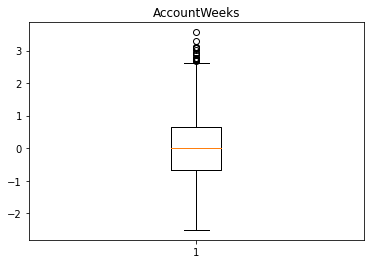

<Figure size 720x504 with 0 Axes>



The Outliers are :  [2.68572534 2.86153348 2.71084079 3.08757252 3.56476604 2.91176438
 2.73595624 2.78618713 3.2884961  3.11268796 3.11268796 3.08757252
 2.78618713 2.73595624 2.91176438 2.71084079 3.01222617 2.71084079]


#################################################################################################



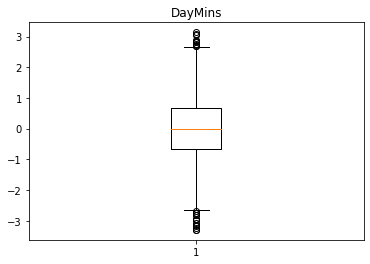

<Figure size 720x504 with 0 Axes>



The Outliers are :  [ 2.81173526  2.8943659   2.69421613  3.14042158  2.85947741 -2.73369879
 -2.67677546  2.83744257  3.06697212 -3.0715663  -2.82551061 -3.30109585
 -3.30109585 -2.94302975  2.75481193 -3.15603317  2.72359591 -2.80531201
 -2.97791824  2.69054365  3.03942858 -3.2533537  -3.15786941 -2.95404716
 -2.75206116]


#################################################################################################



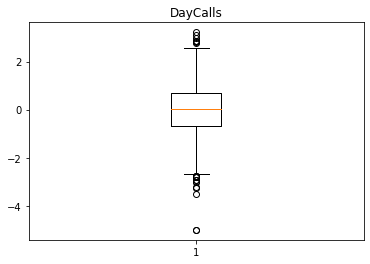

<Figure size 720x504 with 0 Axes>



The Outliers are :  [ 2.86874046  3.11791726 -3.21117353 -3.01183209  2.86874046  3.21758799
 -3.5101857  -2.91216137 -5.00524652 -2.76265529 -5.00524652 -2.76265529
  2.96841118  2.76906974 -3.26100889 -2.91216137  2.86874046  2.8189051
 -2.76265529 -2.81249065 -2.81249065 -2.81249065 -3.01183209]


#################################################################################################



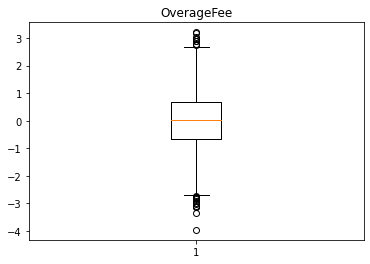

<Figure size 720x504 with 0 Axes>



The Outliers are :  [-2.74184587  2.91027501  2.96943887 -3.34926151  2.94971758 -3.13232735
  2.88660946 -2.80100973 -3.09682903 -2.91933745 -3.12443883 -2.76551141
 -2.80889824 -2.86017359 -3.01399963 -2.78128844  2.95760609 -2.99427834
  2.74067194  3.170596    3.02071421  3.21003857 -3.96456566  2.76828174]


#################################################################################################



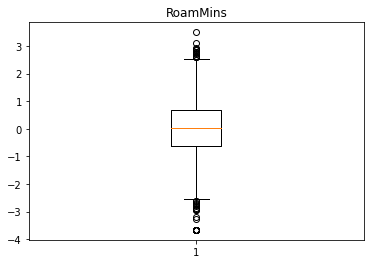

<Figure size 720x504 with 0 Axes>



The Outliers are :  [ 3.49739696 -3.66741342  2.63761972 -2.70016402  3.10333239 -3.66741342
  2.78091592 -2.95093238 -3.66741342  2.60179566  2.60179566  2.85256403
 -3.66741342 -3.66741342 -3.20170074 -3.66741342 -3.66741342 -3.66741342
 -2.87928428  2.78091592 -3.66741342  2.74509187 -3.66741342  2.92421213
 -2.95093238  2.70926782 -2.62851591 -2.55686781  2.63761972 -2.73598807
 -3.66741342 -3.66741342  2.85256403 -3.66741342  2.78091592 -3.27334885
 -3.66741342  2.88838808 -3.66741342 -3.66741342 -2.91510833 -2.62851591
  2.60179566 -2.91510833 -2.80763617 -2.77181212 -3.66741342 -3.66741342
  2.70926782]


#################################################################################################



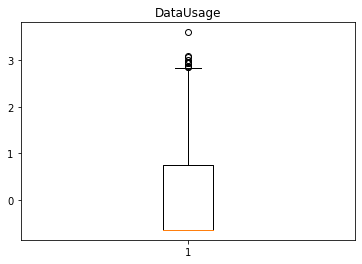

<Figure size 720x504 with 0 Axes>



The Outliers are :  [3.60204937 3.00478911 3.0755173  2.86333274 2.94191961 2.94191961
 2.94191961 2.86333274 3.09123468 2.96549568 2.87905011]


#################################################################################################



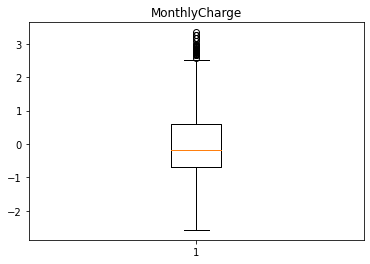

<Figure size 720x504 with 0 Axes>



The Outliers are :  [3.26937737 2.92231514 2.83707178 2.74573961 2.77009486 2.67876269
 2.81880535 3.16586758 3.00146968 2.75791724 3.26937737 2.94667038
 2.69094031 2.73356199 2.81271654 2.78836129 2.89795989 2.5752529
 3.19022283 2.87360465 2.67876269 3.18413402 3.34853192 2.75182842
 2.78836129 2.89187108 2.75791724 2.8492494  2.958848   2.97711444
 3.08062423 2.81880535 2.69702912 2.66049626]


#################################################################################################



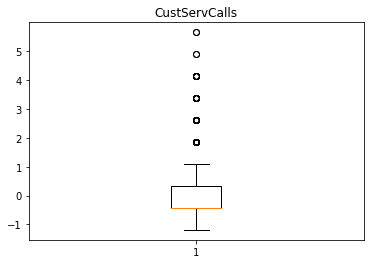

<Figure size 720x504 with 0 Axes>



The Outliers are :  [1.8529274  1.8529274  1.8529274  2.61321388 2.61321388 2.61321388
 1.8529274  1.8529274  1.8529274  1.8529274  1.8529274  1.8529274
 1.8529274  1.8529274  1.8529274  1.8529274  2.61321388 2.61321388
 1.8529274  2.61321388 1.8529274  1.8529274  2.61321388 1.8529274
 1.8529274  1.8529274  1.8529274  1.8529274  2.61321388 1.8529274
 1.8529274  4.13378683 1.8529274  1.8529274  1.8529274  1.8529274
 1.8529274  2.61321388 1.8529274  1.8529274  1.8529274  1.8529274
 1.8529274  2.61321388 1.8529274  4.13378683 1.8529274  5.65435978
 2.61321388 1.8529274  1.8529274  2.61321388 1.8529274  1.8529274
 2.61321388 2.61321388 1.8529274  3.37350035 1.8529274  3.37350035
 2.61321388 2.61321388 2.61321388 3.37350035 2.61321388 1.8529274
 1.8529274  2.61321388 1.8529274  1.8529274  4.13378683 1.8529274
 3.37350035 2.61321388 1.8529274  1.8529274  1.8529274  3.37350035
 1.8529274  1.8529274  2.61321388 1.8529274  1.8529274  1.8529274
 1.8529274  1.8529274  1.8529274  2.61321388 2.61

In [63]:
#finding the outlier in data 

for i in numeric_df.columns:
  plt.title(i)
  plt.boxplot(numeric_df[i])
  fig = plt.figure(figsize =(10, 7))
  
  plt.show()
  
  q1 = np.quantile(numeric_df[i], 0.25)
 
  # finding the 3rd quartile
  q3 = np.quantile(numeric_df[i], 0.75)
  med = np.median(numeric_df[i])
 
  # finding the iqr region
  iqr = q3-q1
 
  # finding upper and lower whiskers
  upper_bound = q3+(1.5*iqr)
  lower_bound = q1-(1.5*iqr)
  outliers = numeric_df[i][(numeric_df[i] <= lower_bound) | (numeric_df[i] >= upper_bound)]
  print("\n")
  print('The Outliers are : ',np.array(outliers))
  print("\n")

  print("#################################################################################################\n")


This plot shows outliers in each of the feature, the dots off min(lower bound) and max(upper bound) are outliers in data. the outliers for features is represented in a list as well.

In [64]:
# Machine Learning
## Feature Scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## ML Models Diffrent Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

## Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

## Comparision of Performance of all Algorithms
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [66]:
X = df[ ['DayMins', 'DayCalls','AccountWeeks','OverageFee','RoamMins','DataUsage','CustServCalls','ContractRenewal']]

y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [67]:
clfk = KNeighborsClassifier(n_neighbors=5, weights='distance')
clfk.fit(X_train, y_train)

pk = clfk.predict(X_test)
pd.DataFrame(classification_report(y_test, pk,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.893576,0.859649,0.891818,0.876613,0.888641
recall,0.991489,0.306250,0.891818,0.648870,0.891818
f1-score,0.939990,0.451613,0.891818,0.695801,0.868953
support,940.000000,160.000000,0.891818,1100.000000,1100.000000


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


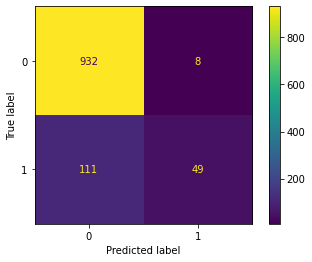

In [68]:
plot_confusion_matrix(clfk, X_test, y_test)

precision, recall and f1 sore on prediction of not churened is quite high and  churned show low scores. with accuracy of the model of 89%.Recall the Fraction of positives that were correctly being, is 38% for churened.

In [69]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(clfk, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0471 ± 0.0140,DayMins
0.0335 ± 0.0074,CustServCalls
0.0175 ± 0.0057,OverageFee
0.0144 ± 0.0040,DataUsage
0.0060 ± 0.0089,ContractRenewal
-0.0009 ± 0.0061,RoamMins
-0.0031 ± 0.0055,DayCalls
-0.0035 ± 0.0051,AccountWeeks


From the above we can see DayCalls and AccountWeeks to be the lease significant.

---




**Permutation Importance**

Permutation feature importance calculates feature importance by shuffling each predictor and recording the increase in RMSE(root mean square error). This will allow us to assess which  predictors are useful for making predictions.

More on it- 

*  https://towardsdatascience.com/from-scratch-permutation-feature-importance-for-ml-interpretability-b60f7d5d1fe9




In [70]:
from scipy import stats
def eliminateOutlier(df):
  z_scores = stats.zscore(df)
  #calculate z-scores of `df`
  abs_z_scores = np.abs(z_scores)
  filtered_entries = (abs_z_scores < 3).all(axis=1)
  return df[filtered_entries]

the code eliminates outlier based on Z score 

In [71]:
df=eliminateOutlier(df)

In [72]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [73]:
X.shape

(2926, 8)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [75]:
clfk = KNeighborsClassifier(n_neighbors=5, weights='distance')
clfk.fit(X_train, y_train)

pk = clfk.predict(X_test)
pd.DataFrame(classification_report(y_test, pk,output_dict=True))


,0,1,accuracy,macro avg,weighted avg
precision,0.913978,0.861111,0.912008,0.887545,0.907904
recall,0.994152,0.279279,0.912008,0.636716,0.912008
f1-score,0.952381,0.421769,0.912008,0.687075,0.891410
support,855.000000,111.000000,0.912008,966.000000,966.000000


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


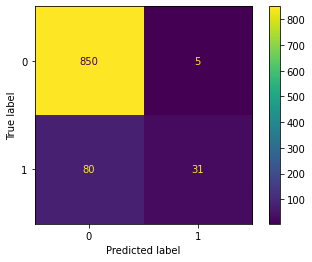

In [76]:
plot_confusion_matrix(clfk, X_test, y_test)

On Removal of Outliers the model's accuracy increases 2%. other parameters pretty much remain the same.